In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import pyproj as pyproj
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [61]:
# Lee el archivo CSV en un DataFrame
data = pd.read_csv('C:/Users/Vanesa Vasquez/Desktop/Mapas/dataframe_completo.csv')

# Obtiene un listado de todas las columnas
columnas = data.columns

# Imprime las columnas
print("Listado de todas las columnas:")
for columna in columnas:
    print(columna)

Listado de todas las columnas:
Year
Quarter
Provincia
Partido
Localidad
Poblacion_2022
Acc_cada_100_hog
Acc_cada_100_hab
ADSL_2022
Cablemodem_2022
Dial Up_2022
Fibra optica_2022
Satelital_2022
Wireless_2022
Telefonia Fija_2022
3G_2022
4G_2022
Cant_ADSL_2022
Cant_Cablemodem_2022
Cant_DialUp_2022
Cant_FibraOptica_2022
Cant_Otros_2022
Cant_Satelital_2022
Cant_Wimax_2022
Cant_Wireless_2022
Total_2022
Pob_prov_2022
Salario_promedio
Latitud
Longitud


In [62]:
# Crear un objeto de proyección Mercator
wgs84 = pyproj.Proj(init="epsg:4326")  # Coordenadas geográficas (latitud y longitud)
web_mercator = pyproj.Proj(init="epsg:3857")  # Coordenadas Mercator

# Supongamos que tienes un DataFrame llamado 'data' con las columnas 'Latitud' y 'Longitud'
latitudes = data['Latitud'].tolist()
longitudes = data['Longitud'].tolist()

# Convertir latitud y longitud a x e y
x, y = pyproj.transform(wgs84, web_mercator, longitudes, latitudes)

# Ahora, los valores de x e y contienen las coordenadas en el sistema "x" e "y"
# Puedes agregarlos de nuevo al DataFrame si lo deseas
data['X'] = x
data['Y'] = y

c:\Users\Vanesa Vasquez\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\Vanesa Vasquez\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Vanesa Vasquez\AppData\Local\Temp\ipykernel_7556\2357165982.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.g

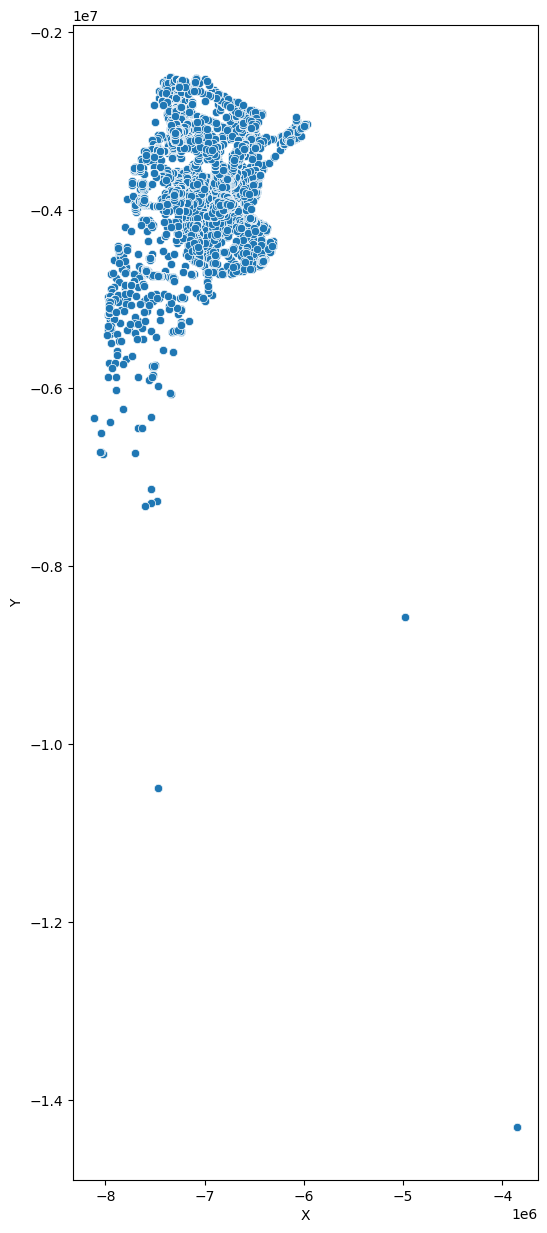

In [63]:
plt.figure(figsize=(6, 15))
sns.scatterplot(data= data, x='X', y='Y')
plt.show()

Buscando los valores atipicos

In [64]:
filtered_antartida = data[data['Partido'] == 'ANTARTIDA ARGENTINA']

# Contar cuántos valores tienen "Antártida" en la columna 'Partido'
count_antartida = len(filtered_antartida)

# Muestra los valores y la cantidad de "Antártida"
print("Valores de 'ANTARTIDA ARGENTINA':")
print(filtered_antartida)

print("Cantidad de valores 'ANTARTIDA ARGENTINA':", count_antartida)



Valores de 'ANTARTIDA ARGENTINA':
        Year  Quarter         Provincia              Partido  \
104472  2022        4  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104473  2022        4  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104474  2022        4  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104479  2022        3  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104480  2022        3  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
...      ...      ...               ...                  ...   
104711  2014        2  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104712  2014        2  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104717  2014        1  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104718  2014        1  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   
104719  2014        1  TIERRA DEL FUEGO  ANTARTIDA ARGENTINA   

               Localidad  Poblacion_2022  Acc_cada_100_hog  Acc_cada_100_hab  \
104472  Base Belgrano Ii               0            101.44                30   
104473      Base Orcadas             

In [65]:
#creando un nuevo df sin los valores de antartida
new_df = data.loc[data['Partido'] != 'ANTARTIDA ARGENTINA']

new_df.head()

,Year,Quarter,Provincia,Partido,Localidad,Poblacion_2022,Acc_cada_100_hog,Acc_cada_100_hab,ADSL_2022,Cablemodem_2022,...,Cant_Satelital_2022,Cant_Wimax_2022,Cant_Wireless_2022,Total_2022,Pob_prov_2022,Salario_promedio,Latitud,Longitud,X,Y
0,2022,4,BUENOS AIRES,9 de Julio,Dudignac,2670,78.94,27,0,0,...,0,0,463,464,14911542,2136200,-35.651193,-60.709896,-6.758195e+06,-4.252732e+06
1,2022,4,BUENOS AIRES,9 de Julio,Patricios,745,78.94,27,1,0,...,0,0,0,81,14911542,2136200,-35.439553,-60.717438,-6.759034e+06,-4.223776e+06
2,2022,4,BUENOS AIRES,Adolfo Alsina,Carhué,9660,78.94,27,1,0,...,0,0,283,2482,14911542,2136200,-37.177480,-62.757896,-6.986177e+06,-4.463874e+06
3,2022,4,BUENOS AIRES,Adolfo Alsina,Colonia San Miguel Arcángel,563,78.94,27,0,0,...,0,0,0,208,14911542,2136200,-37.448619,-63.117609,-7.026220e+06,-4.501824e+06
4,2022,4,BUENOS AIRES,Azul,Azul,55728,78.94,27,1,1,...,2,0,1145,17661,14911542,2136200,-36.779514,-59.858633,-6.663433e+06,-4.408418e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107054,2014,1,TUCUMAN,Lules,El Manantial,14582,33.42,8,0,0,...,0,0,29,2561,1210114,106227,-26.844560,-65.285669,-7.267567e+06,-3.104065e+06
107055,2014,1,TUCUMAN,Lules,Ingenio San Pablo,9620,33.42,8,1,0,...,0,0,187,1137,1210114,106227,-26.873997,-65.310350,-7.270315e+06,-3.107738e+06
107056,2014,1,TUCUMAN,Lules,La Reducción,5029,33.42,8,1,0,...,0,0,0,379,1210114,106227,-26.960134,-65.351473,-7.274893e+06,-3.118492e+06
107057,2014,1,TUCUMAN,Lules,Lules,21088,33.42,8,1,1,...,0,0,415,3080,1210114,106227,-26.923938,-65.336402,-7.273215e+06,-3.113972e+06


PREPARANDO LOS DATOS

In [66]:
#seleccionando las coordenadas 
X = new_df[['X', 'Y']]
X

,X,Y
0,-6.758195e+06,-4.252732e+06
1,-6.759034e+06,-4.223776e+06
2,-6.986177e+06,-4.463874e+06
3,-7.026220e+06,-4.501824e+06
4,-6.663433e+06,-4.408418e+06
...,...,...
107059,-7.303000e+06,-3.147170e+06
107060,-7.291291e+06,-3.144411e+06
107061,-7.294479e+06,-3.151083e+06
107062,-7.298033e+06,-3.157126e+06


Valores del rango de datos en x e y, y valores maximos y minimos

In [67]:
# Supongamos que tienes las coordenadas 'X' y 'Y' en un DataFrame 'data'
x_range = np.ptp(new_df['X'])  # Pico a pico (rango) en el eje X
y_range = np.ptp(new_df['Y'])  # Pico a pico (rango) en el eje Y

print("Rango en X:", x_range)
print("Rango en Y:", y_range)

x_min = new_df['X'].min()  # Valor mínimo en el eje X
x_max = new_df['X'].max()  # Valor máximo en el eje X

print("Valor mínimo en X:", x_min)
print("Valor máximo en X:", x_max)



Rango en X: 2142278.2969636647
Rango en Y: 4819001.870933026
Valor mínimo en X: -8114258.768450578
Valor máximo en X: -5971980.471486913


Estandarizacion de los datos

In [68]:
scaler = StandardScaler()
new_df[['X', 'Y']] = scaler.fit_transform(new_df[['X', 'Y']])

C:\Users\Vanesa Vasquez\AppData\Local\Temp\ipykernel_7556\930425711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['X', 'Y']] = scaler.fit_transform(new_df[['X', 'Y']])


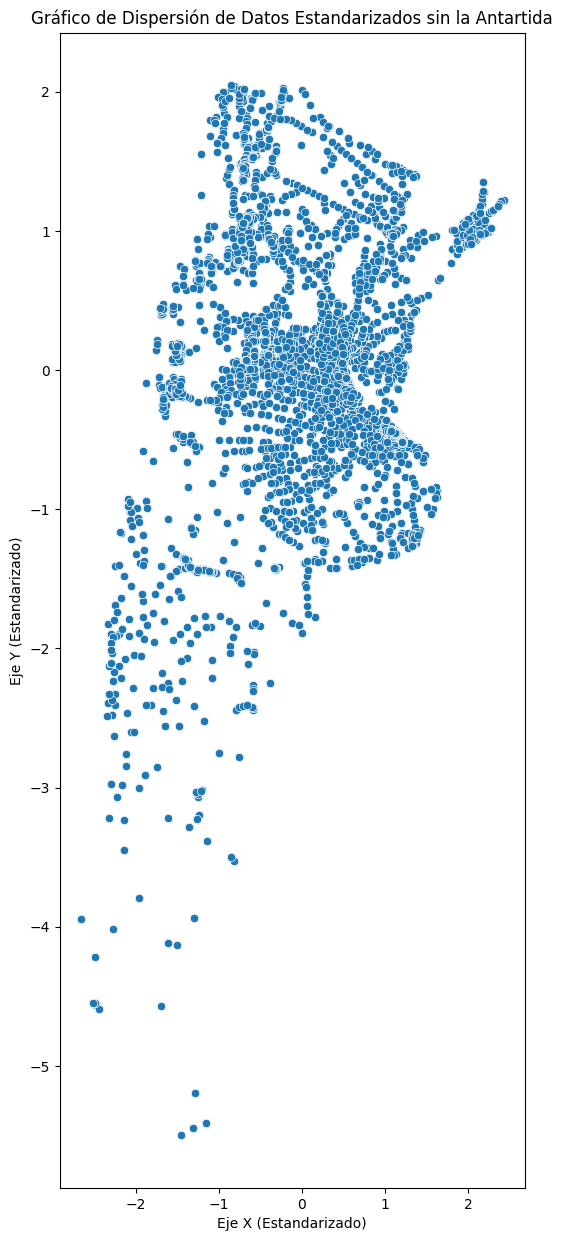

In [69]:
#Visualizando sin los valores de la antartida
plt.figure(figsize=(6,15))  # Ajusta el tamaño de la figura según tus preferencias
sns.scatterplot(x=new_df['X'], y=new_df['Y'])
# Configurar etiquetas de ejes y título
plt.xlabel('Eje X (Estandarizado)')
plt.ylabel('Eje Y (Estandarizado)')
plt.title('Gráfico de Dispersión de Datos Estandarizados sin la Antartida')

# Mostrar el gráfico
plt.show()


Se vuelve a ver el rango, minimo y maximo

In [70]:
# coordenadas 'X' y 'Y' en un DataFrame 'data'
x_range = np.ptp(new_df['X'])  # Pico a pico (rango) en el eje X
y_range = np.ptp(new_df['Y'])  # Pico a pico (rango) en el eje Y

print("Rango en X:", x_range)
print("Rango en Y:", y_range)

x_min = new_df['X'].min()  # Valor mínimo en el eje X
x_max = new_df['X'].max()  # Valor máximo en el eje X

y_min = new_df['Y'].min()  # Valor mínimo en el eje Y
y_max = new_df['Y'].max()  # Valor máximo en el eje Y

print("Valor mínimo en X:", x_min)
print("Valor máximo en X:", x_max)
print("Valor mínimo en Y:", y_min)
print("Valor máximo en Y:", y_max)


Rango en X: 5.094531941541774
Rango en Y: 7.544820174618821
Valor mínimo en X: -2.663831938509376
Valor máximo en X: 2.4307000030323986
Valor mínimo en Y: -5.497445119528425
Valor máximo en Y: 2.047375055090396


In [85]:
#se vuelven a guardar los datos en X ahora estandarizados y sin los outliers
X = new_df[['X', 'Y']]  

,X,Y
0,0.561011,-0.689181
1,0.559015,-0.643847
2,0.018849,-1.019754
3,-0.076377,-1.079171
4,0.786364,-0.932930
...,...,...
107059,-0.734585,1.041730
107060,-0.706739,1.046049
107061,-0.714321,1.035603
107062,-0.722773,1.026142


Creo un nuevo DF con solo 5000 filas de forma aleatoria para poder evaluar el algoritmo
Como el Dataset es muy grande se prueba el algoritmo en una muesta, para poder evaluar el BSSCAN, las metricas y los hyperparametros

In [343]:
# Número de filas que deseas seleccionar (en este caso, 100).
num_filas = 5000

# Crea un nuevo DataFrame con 100 filas aleatorias de 'new_df'.
df_ran = new_df.sample(n=num_filas, random_state=1)  # random_state para reproducibilidad

In [344]:
#como se va a trabajar con una muestra random se asignan a X_ran
X_ran = df_ran[['X', 'Y']]

Calculando las distancias entre los puntos cercanos

In [345]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_ran)
distances, indices = neighbors_fit.kneighbors(X_ran)

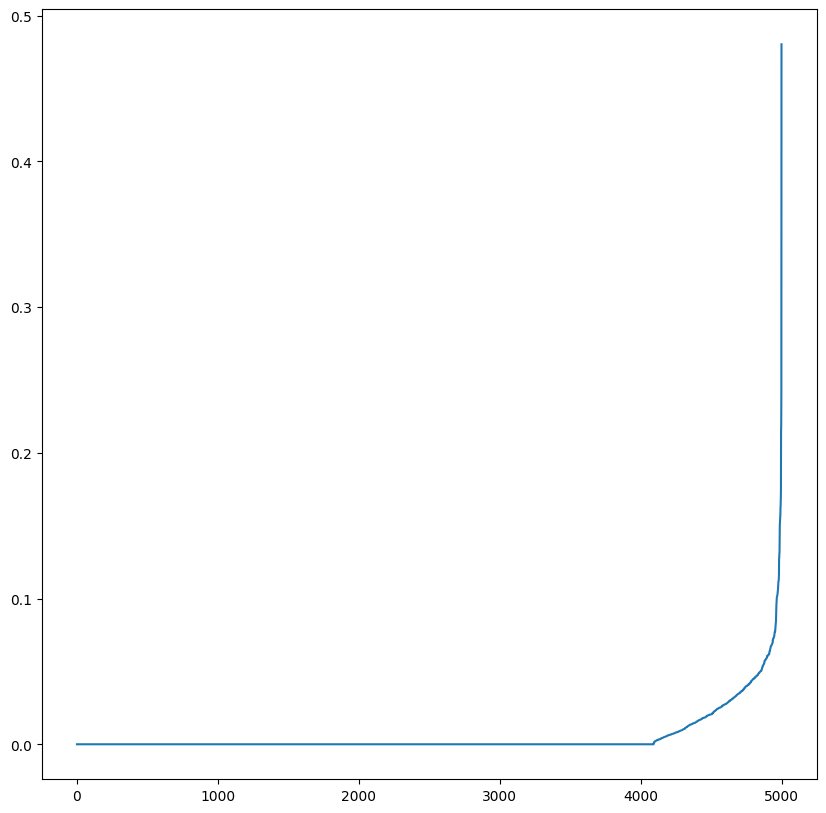

In [346]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

#grafica de las distancias
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [363]:
#se crea un rando de valores para el radio del circulo: eps y la cantidad de puntos 
eps_values = np.arange(0.001, 0.01, 0.001) 
min_samples = np.arange(2,6)

Se Aplica DBSCAN

In [377]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []

for p in dbscan_paramns: 
    y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X_ran)
    sil_scores.append(silhouette_score(X_ran,y_pred))

# Redondea los valores de sil_scores a 3 decimales
sil_scores_rounded = [round(score, 3) for score in sil_scores]


In [378]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps','Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores_rounded

Creacion del Hetmap con los valores de sil_scores

In [379]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores',index='Min_Samples',columns='Eps')

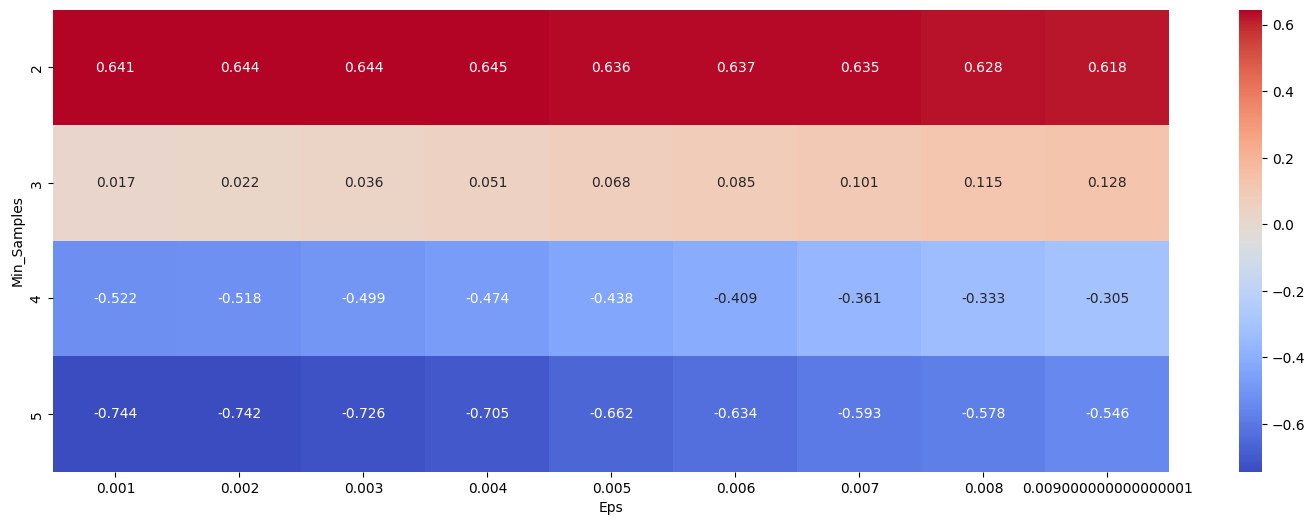

In [387]:
# Crea el mapa de calor con los valores redondeados
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_data, annot=True, fmt='.3f' ,annot_kws={'size': 10}, cmap='coolwarm', ax=ax)
plt.show()


Aplicacion de DBSCAN con el eps y min_samples mas optimos y visualizacion

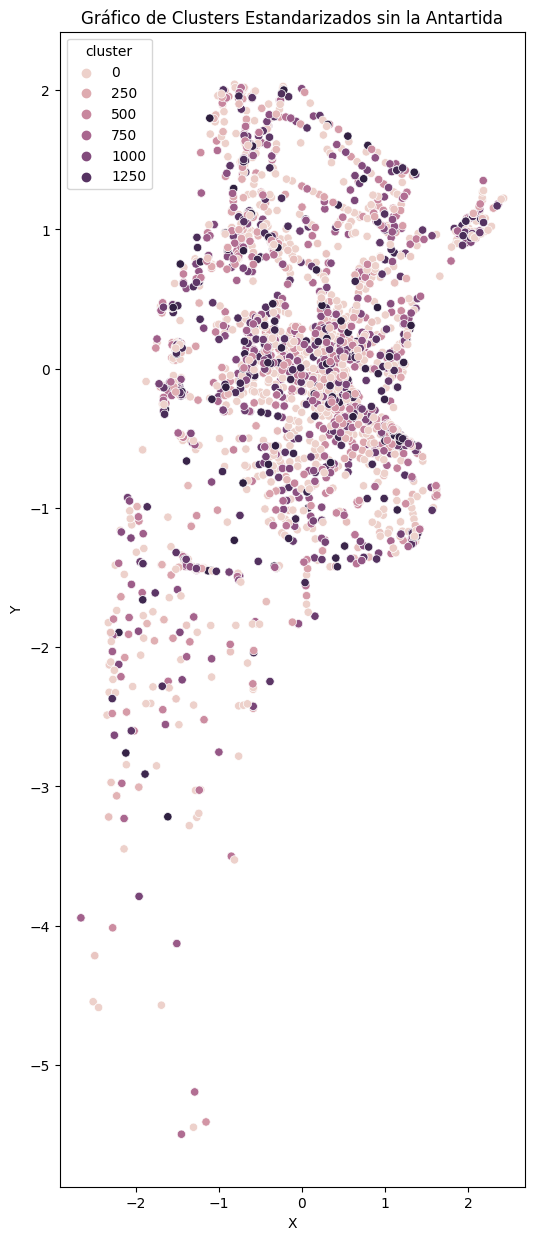

In [397]:
dbscan_cluster = DBSCAN(eps=0.004, min_samples=2)
y_predict = dbscan_cluster.fit_predict(X_ran)
df_ran['cluster'] = y_predict


# Crear un scatter plot
plt.figure(figsize=(6,15))  # Ajusta el tamaño de la figura según tus preferencias
sns.scatterplot(data=df_ran, x=df_ran['X'], y=df_ran['Y'], hue='cluster')
plt.title('Gráfico de Clusters Estandarizados sin la Antartida')
plt.show()

In [398]:
# cantidad de valores únicos en la columna 'cluster'.
cantidad_uniques = df_ran['cluster'].nunique()

# Muestra la cantidad de valores únicos en la columna 'cluster'.
print(f'Cantidad cluster creados: {cantidad_uniques}')


Cantidad cluster creados: 1494


Evaluando
Codigo extraido desde la documentacion de sklearn

For n_clusters = 1494 The average silhouette_score is : 0.6449438866429279


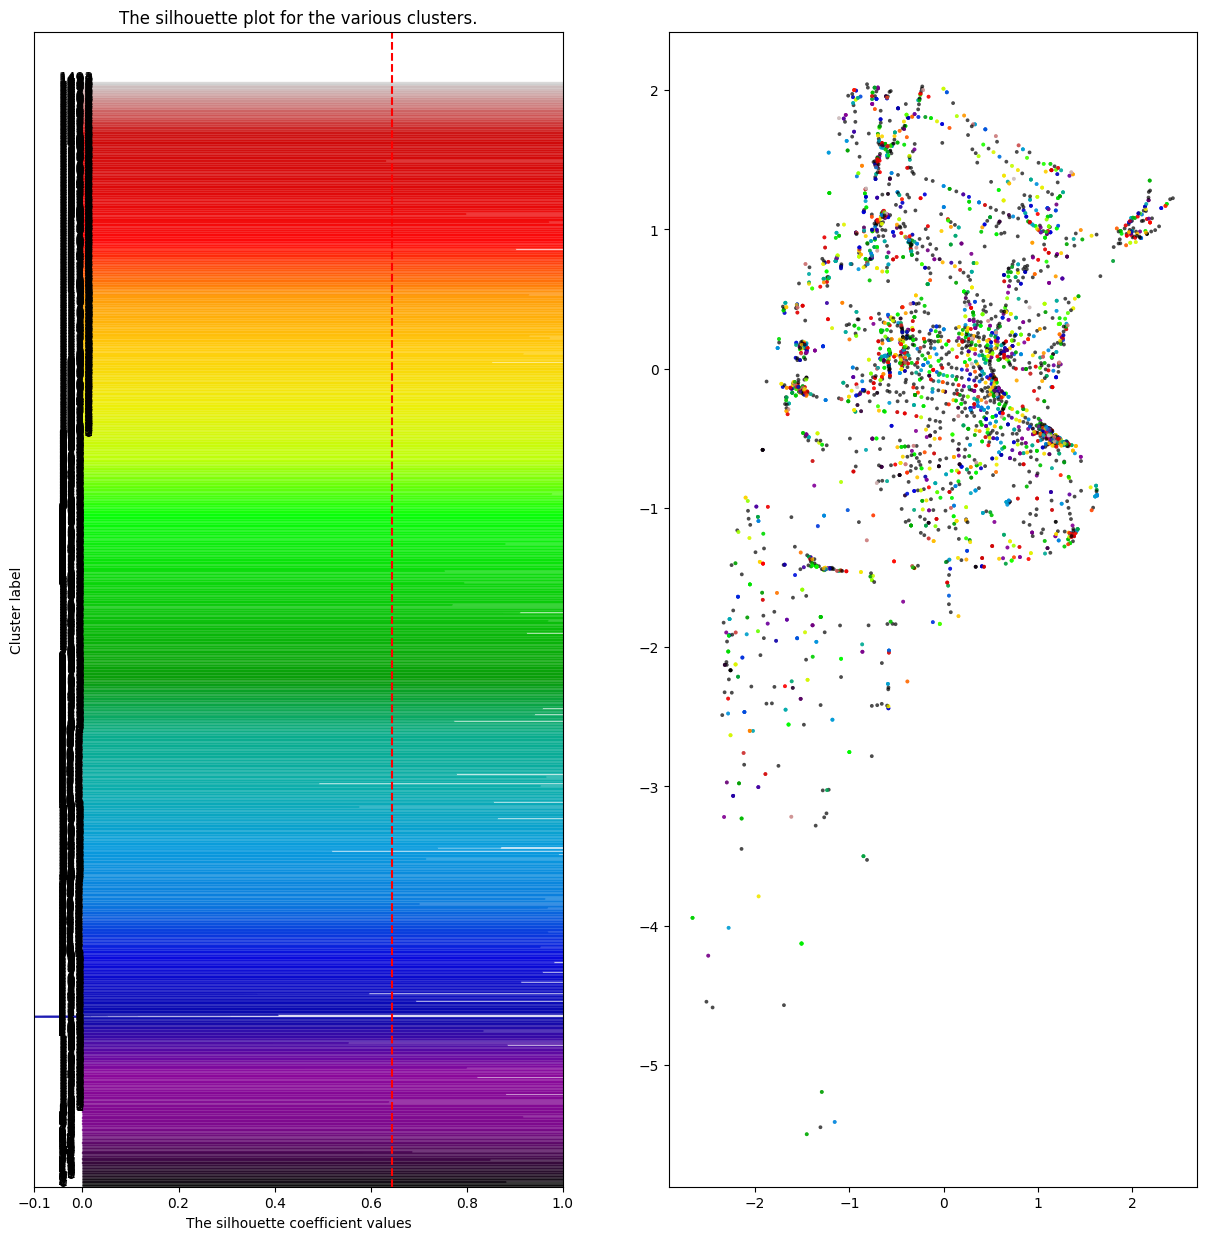

In [400]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 15)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.004, min_samples=2)
cluster_labels = clusterer.fit_predict(X_ran)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X_ran) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_ran, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_ran, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X_ran['X'], X_ran['Y'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)



plt.show()